## <font color=green>Day-8</font>

- Our topic of discussion is <font color=green size="4">**K-Nearest Neighbour Classification**</font>
- Dataset That we would be using : Breast Cancer Wisconsin
    - The Dataset has already been downloaded and is placed in the folder ./Dataset/Classification/
    - Incase if you face any problems, you can download that dataset from kaggle using the link https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
    
- Sections
    0. **Learning Contents about K-Nearest Neighbour Classification**
    1. Importing Headers
    2. Importing Data
    3. Data Exploration
    4. Data Encoding
    5. EDA
    6. Data Scaling & Dimentionality Reduction using PCA
    7. Data Preparation
    9. Modelling
    10. Model Evaluation
    11. Finding Optimised K for best accuray
    12. Model Evaluation
    
    Conclusion
- Further Experimenting can be done using Cross Validation

### Author of the Document : <font color="Green">Karnati Sai Venkata Giri</font>
### Feel free to reach me out at : <font color="Green">karnatisaivenkatagiri@gmail.com</font>

## Learning : Linear Discriminant Analysis

1. What is KNN Classification? : [Link](https://www.youtube.com/watch?v=HVXime0nQeI)
2. Perfect Blog on KNN Classification : [Link](https://towardsdatascience.com/getting-acquainted-with-k-nearest-neighbors-ba0a9ecf354f)
3. Kaggle Tutorial : [Link](https://www.kaggle.com/code/prashant111/knn-classifier-tutorial/notebook)
4. DataCamp Tutorial : [Link](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)

Advantages of KNN Classifier
- KNN classifier is one of the most sophisticated and widely used classification algorithm. Some of the features that make this algorithm so popular are as mentioned below:

- KNN does not make any underlying assumption about the data.
- It has a relatively higher accuracy than many classification algorithms.
- With the addition of more data points, the classifier constantly evolves and is capable of quickly adapting to the changes in input dataset.
- It gives the user the flexibility to choose the distance measure metric

Limitations of KNN Classifier
- Though the classifier has multiple advantages, it also comes with certain crucial limitations. Some of these limitations are as mentioned below:

- KNN is very sensitive to outliers.
- As dataset grows, the classification becomes slower
- KNN is not capable of dealing with missing values.
- It is computationally expensive due to high storage requirements.


## 1. Importing Headers

In [1]:
# Computation Libraries
import numpy as np
import pandas as pd

# Stats Libraries
import statistics as stats

# Visualisazition Libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Modelling Libraries
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## 2. Importing Data


In [2]:
# Importing Data
df = pd.read_csv("./Dataset/Classification/breastCancerWisconsin.csv")
print("The dataset has {0} rows and {1} features".format(len(df),len(df.columns)))
df.head()

The dataset has 569 rows and 33 features


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### <font color=green>Inferences</font>
- We have 569 rows and 33 features
- Our Target Feature is "Species"


Analysis

- Input Features : 
    - 30 features excluding id, Diagnosis and Unnamed 32
- Output :
    1. Diagnosis

## 3. Data Exploration

In [3]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [4]:
# As all rows of unnamed: 32 are Nan I am dropping the row from further steps
df = df.drop(["Unnamed: 32"],axis=1)

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

## 4. Data Encoding

In [7]:
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 5. EDA

In [9]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<AxesSubplot:>

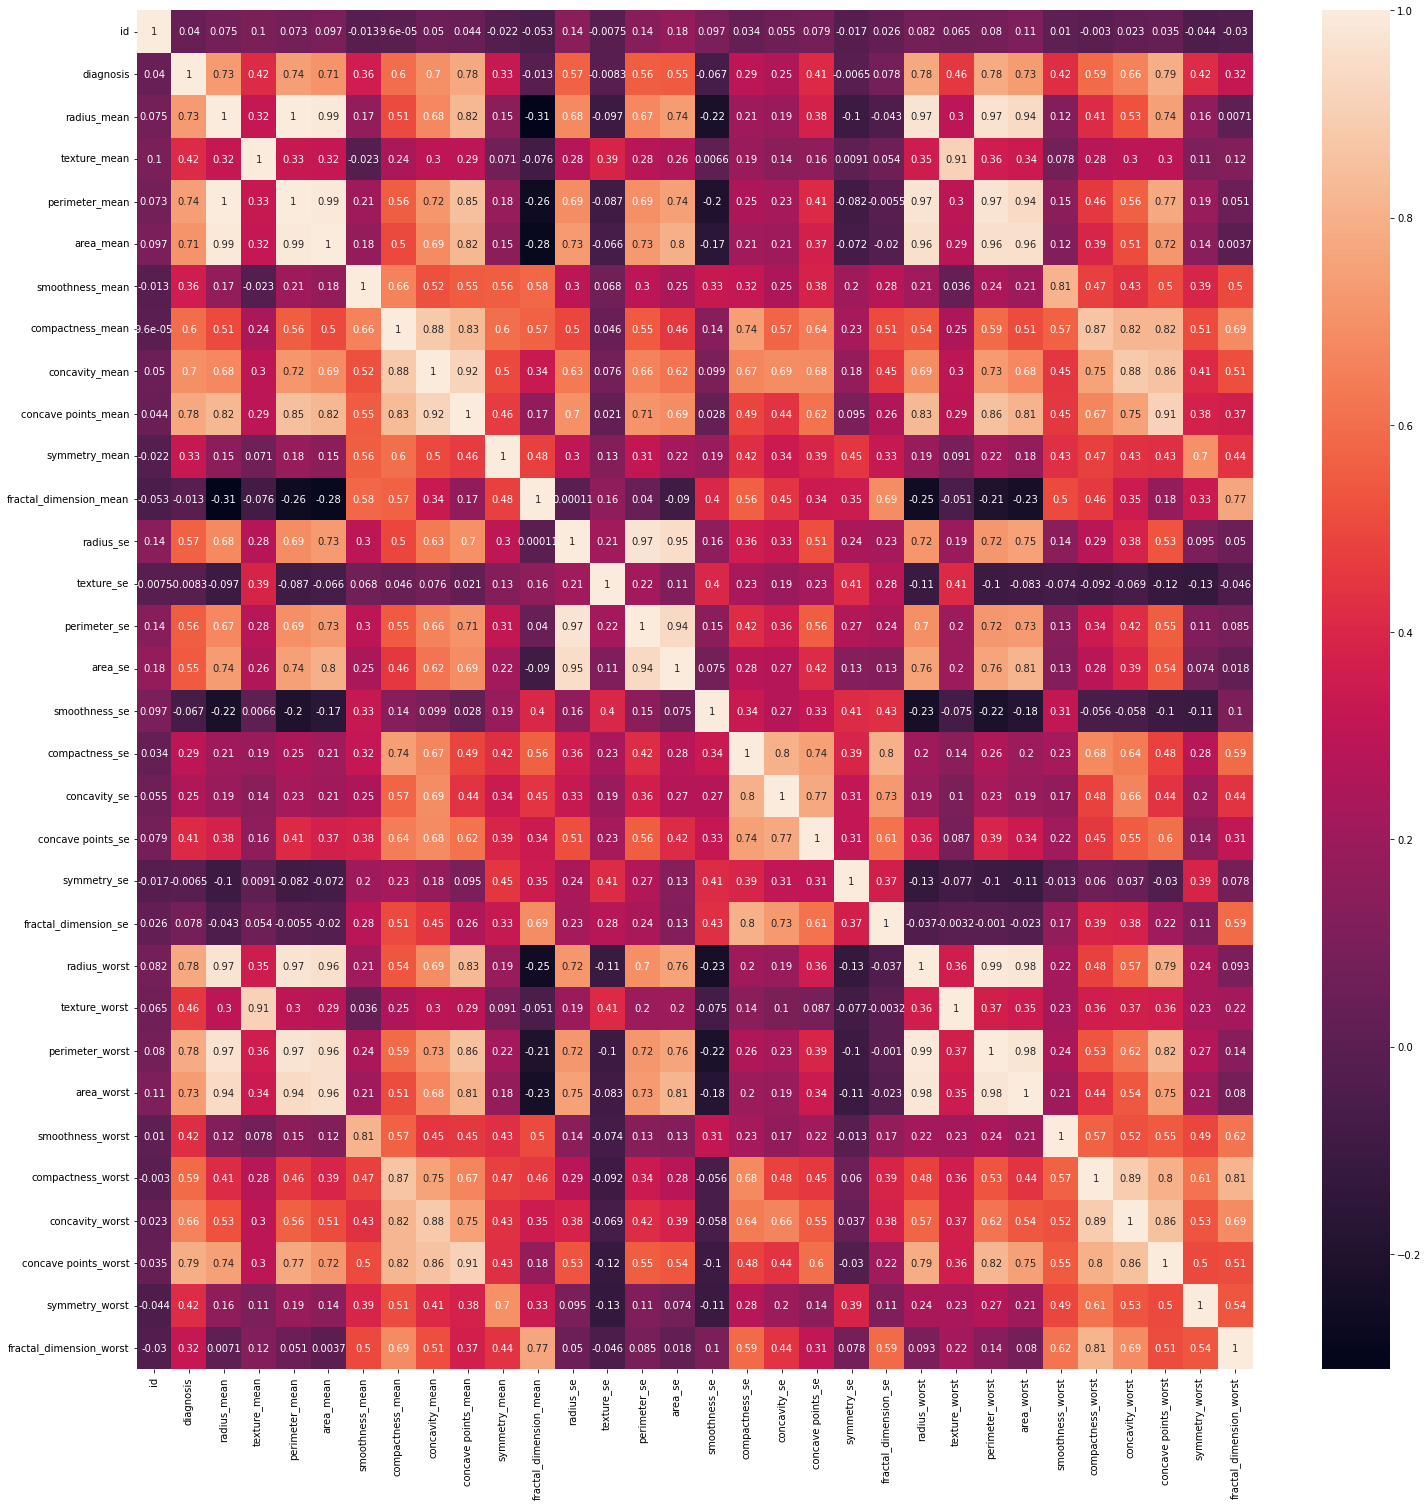

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot=True)

### <font color=green>Inferences</font>
- Attributes like 'id','texture_worst' etc are not co-related to any other variables

## 6. Data Scaling & Dimentionality Reduction using PCA

In [11]:
X = df.drop(["diagnosis"],axis=1)
Y = df["diagnosis"]

In [12]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X)

pca = PCA(n_components = 10)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_df = pd.DataFrame(x_pca, columns=component_names)
X_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372281,0.371844,2.180532,-0.231596,-0.090412
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126616,-0.288270,0.044933,0.426905,-0.659929
2,5.742472,-1.080350,-0.533088,0.903470,-0.180602,-0.401854,0.463187,-0.715211,-0.010731,-0.082283
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561667,1.950177,1.287990,1.272633,-1.171356
4,3.945694,-1.959689,1.401177,2.937555,0.540853,1.233299,-0.205435,-0.959325,0.629142,-0.166373


In [13]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

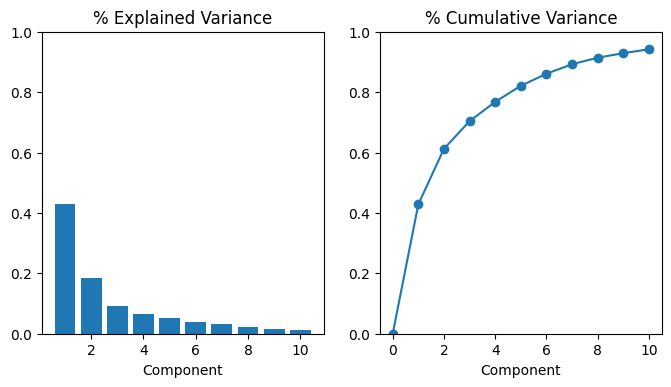

In [14]:
plot_variance(pca)

### <font color=green>Inferences</font>
- THe cummulative Variance plot shows that having 8 attributes is good enough to proceed

In [15]:
pca = PCA(n_components = 8)
x_pca = pca.fit_transform(scaled_data)

component_names = [f"PC{i+1}" for i in range(x_pca.shape[1])]
X_df = pd.DataFrame(x_pca, columns=component_names)
X_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,9.183200,1.971271,-1.171625,3.639332,-1.193098,-1.372285,0.371837,2.180542
1,2.383298,-3.753459,-0.580229,1.127438,0.624850,-0.126614,-0.288270,0.044920
2,5.742472,-1.080350,-0.533088,0.903470,-0.180601,-0.401855,0.463182,-0.715218
3,7.124384,10.272225,-3.150161,0.121512,-2.968055,-2.561667,1.950185,1.287999
4,3.945694,-1.959689,1.401177,2.937555,0.540852,1.233300,-0.205423,-0.959308


array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

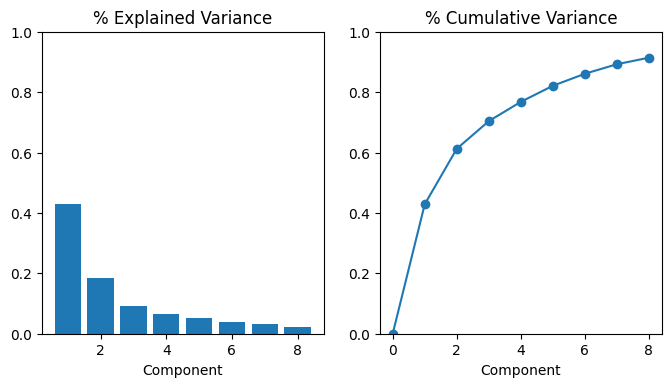

In [16]:
plot_variance(pca)

### <font color=green>Perfect!!</font>
- Lets move on to Model Training

## 7. Data Preparation

In [17]:
print(X_df.shape,Y.shape)
train_x,test_x,train_y,test_y  = train_test_split(X_df,Y, test_size = 0.2,random_state = 42)

(569, 8) (569,)


## 8. Modelling

In [18]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=3)

## 9. Model Evaluation

In [19]:
pred = model.predict(test_x)

In [20]:
print("Train set Accuracy: ", accuracy_score(train_y, model.predict(train_x)))
print("Test set Accuracy: ", accuracy_score(test_y, pred))

Train set Accuracy:  0.989010989010989
Test set Accuracy:  0.9385964912280702


## 10. Finding Optimised K for best accuray

In [21]:
Ks = 8
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(train_x,train_y)
    yhat=neigh.predict(test_x)
    mean_acc[n-1] = accuracy_score(test_y, yhat)

    
    std_acc[n-1]=np.std(yhat==test_y)/np.sqrt(yhat.shape[0])

mean_acc

array([0.93859649, 0.93859649, 0.93859649, 0.94736842, 0.94736842,
       0.95614035, 0.95614035])

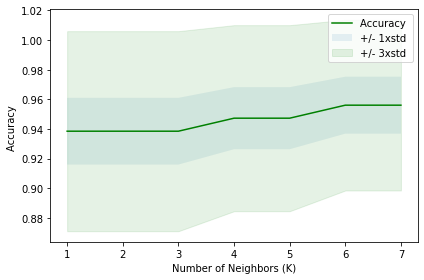

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.956140350877193 with k= 6


## 11. Model Evaluation

In [24]:
model = KNeighborsClassifier(n_neighbors=6)
model.fit(train_x,train_y)

pred = model.predict(test_x)

print("Train set Accuracy: ", accuracy_score(train_y, model.predict(train_x)))
print("Test set Accuracy: ", accuracy_score(test_y, pred))

Train set Accuracy:  0.9692307692307692
Test set Accuracy:  0.956140350877193


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(list(test_y), list(pred))
confusion_matrix


array([[69,  2],
       [ 3, 40]])

In [26]:
print("Final result of the model \n {}".format(classification_report(list(test_y), list(pred))))

Final result of the model 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



### <font color=green>Conclusion</font>
- KNN Classification has been successfully applied on Breast Cancer Wisconsin dataset
- PCA is used for Dimentionality Reduction
- The best accuracy was found at K=6 
- Results
    - Train set Accuracy:  0.9692307692307692
    - Test set Accuracy:  0.956140350877193 

<img src="./Data/thank.jpg"/>
---------------------------------------------------------------------------------------- END OF NOTEBOOK -------------------------------------------------------------------------------------